In [354]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import requests
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets
from matplotlib.font_manager import FontProperties
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats

In [355]:
def read_file(dataFrame, input_file_path, race_code, year):    
    try:
        temp_df = pd.read_excel (input_file_path, sheet_name = 0, names=['Median income'], index_col=None, usecols="A")
        temp_df["Race"] = race_code
        temp_df["Year"] = year
        temp_df.fillna(method='ffill', inplace=True)
        frames = [dataFrame, temp_df]
        dataFrame = pd.concat(frames, ignore_index=True)
    except:
        print("Error while trying to read in file ", input_file_path)
    finally:
        return(dataFrame)

In [356]:
try:
    del df
except NameError:
    print("Error")

df = pd.DataFrame()
#----------------------------- 2019 ---------------------------------------------------------#
df = read_file(df, os.path.join('SourceData', '2019_All_Races_Median_Income.xlsx'),  "AL", 2019)
df = read_file(df, os.path.join('SourceData', '2019_White_Only_Median_Income.xlsx'), "WO", 2019)
df = read_file(df, os.path.join('SourceData', '2019_Black_Only_Median_Income.xlsx'), "BO", 2019)
df = read_file(df, os.path.join('SourceData', '2019_Asian_Only_Median_Income.xlsx'), "AO", 2019)
df = read_file(df, os.path.join('SourceData', '2019_Hispanic_Only_Median_Income.xlsx'),  "HI", 2019)
#----------------------------- 2018 ---------------------------------------------------------#
df = read_file(df, os.path.join('SourceData', '2018_All_Races_Median_Income.xlsx'),  "AL", 2018)
df = read_file(df, os.path.join('SourceData', '2018_White_Only_Median_Income.xlsx'), "WO", 2018)
df = read_file(df, os.path.join('SourceData', '2018_Black_Only_Median_Income.xlsx'), "BO", 2018)
df = read_file(df, os.path.join('SourceData', '2018_Asian_Only_Median_Income.xlsx'), "AO", 2018)
df = read_file(df, os.path.join('SourceData', '2018_Hispanic_Only_Median_Income.xlsx'),  "HI", 2018)
#----------------------------- 2017 ---------------------------------------------------------#
df = read_file(df, os.path.join('SourceData', '2017_All_Races_Median_Income.xlsx'),  "AL", 2017)
df = read_file(df, os.path.join('SourceData', '2017_White_Only_Median_Income.xlsx'), "WO", 2017)
df = read_file(df, os.path.join('SourceData', '2017_Black_Only_Median_Income.xlsx'), "BO", 2017)
df = read_file(df, os.path.join('SourceData', '2017_Asian_Only_Median_Income.xlsx'), "AO", 2017)
df = read_file(df, os.path.join('SourceData', '2017_Hispanic_Only_Median_Income.xlsx'),  "HI", 2017)
#----------------------------- 2016 ---------------------------------------------------------#
df = read_file(df, os.path.join('SourceData', '2016_All_Races_Median_Income.xlsx'),  "AL", 2016)
df = read_file(df, os.path.join('SourceData', '2016_White_Only_Median_Income.xlsx'), "WO", 2016)
df = read_file(df, os.path.join('SourceData', '2016_Black_Only_Median_Income.xlsx'), "BO", 2016)
df = read_file(df, os.path.join('SourceData', '2016_Asian_Only_Median_Income.xlsx'), "AO", 2016)
df = read_file(df, os.path.join('SourceData', '2016_Hispanic_Only_Median_Income.xlsx'),  "HI", 2016)
#----------------------------- 2015 ---------------------------------------------------------#
df = read_file(df, os.path.join('SourceData', '2015_All_Races_Median_Income.xlsx'),  "AL", 2015)
df = read_file(df, os.path.join('SourceData', '2015_White_Only_Median_Income.xlsx'), "WO", 2015)
df = read_file(df, os.path.join('SourceData', '2015_Black_Only_Median_Income.xlsx'), "BO", 2015)
df = read_file(df, os.path.join('SourceData', '2015_Asian_Only_Median_Income.xlsx'), "AO", 2015)
df = read_file(df, os.path.join('SourceData', '2015_Hispanic_Only_Median_Income.xlsx'),  "HI", 2015)

In [357]:
df = df[['Median income','Race', 'Year']]

In [358]:
df.sort_values(by=['Year'])

,Median income,Race,Year
24,47328,HI,2015
22,45781,BO,2015
21,74291,WO,2015
20,70697,AL,2015
23,90847,AO,2015
19,51105,HI,2016
18,93498,AO,2016
17,49365,BO,2016
16,76264,WO,2016
15,72707,AL,2016


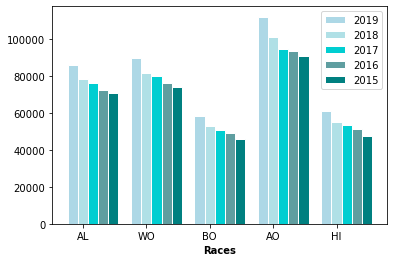

In [359]:

temp_df = df[["Year","Race","Median income"] ]

labels = temp_df["Race"].unique()
barWidth = 0.16

med_inc_for_2019  = temp_df[ temp_df["Year"] == 2019]["Median income"].astype(int)
med_inc_for_2018  = temp_df[ temp_df["Year"] == 2018]["Median income"].astype(int)
med_inc_for_2017  = temp_df[ temp_df["Year"] == 2017]["Median income"].astype(int)
med_inc_for_2016  = temp_df[ temp_df["Year"] == 2016]["Median income"].astype(int)
med_inc_for_2015  = temp_df[ temp_df["Year"] == 2015]["Median income"].astype(int)

r1 = np.arange(len(labels))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


plt.bar(r1, med_inc_for_2019, color='lightblue', width=barWidth, edgecolor='white', label='2019')
plt.bar(r2, med_inc_for_2018, color='powderblue', width=barWidth, edgecolor='white', label='2018')
plt.bar(r3, med_inc_for_2017, color='darkturquoise', width=barWidth, edgecolor='white', label='2017')
plt.bar(r4, med_inc_for_2016, color='cadetblue', width=barWidth, edgecolor='white', label='2016')
plt.bar(r5, med_inc_for_2015, color='teal', width=barWidth, edgecolor='white', label='2015')

# Add xticks on the middle of the group bars
plt.xlabel('Races', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(labels))], labels)


 
# Create legend & Show graphic
plt.legend()
plt.show()


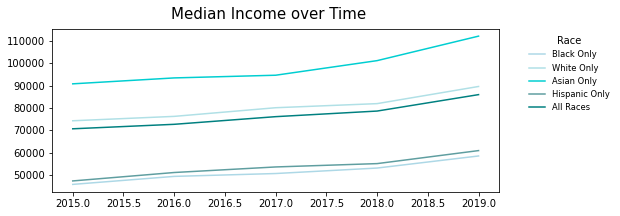

In [360]:
temp_df = df[["Year","Race","Median income"] ]
years = temp_df["Year"].unique()

fontP = FontProperties()
fontP.set_size('small')

x =  (years)

med_inc_for_bo  = temp_df[ temp_df["Race"] == 'BO']["Median income"]
med_inc_for_wo  = temp_df[ temp_df["Race"] == 'WO']["Median income"]
med_inc_for_ao  = temp_df[ temp_df["Race"] == 'AO']["Median income"]
med_inc_for_hi  = temp_df[ temp_df["Race"] == 'HI']["Median income"]
med_inc_for_al  = temp_df[ temp_df["Race"] == 'AL']["Median income"]

# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 3))

# Set the title for the figure
fig.suptitle("Median Income over Time", fontsize=15)

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(x, med_inc_for_bo, color="lightblue", label="Black Only")
ax.plot(x, med_inc_for_wo, color="powderblue", label="White Only")
ax.plot(x, med_inc_for_ao, color="darkturquoise", label="Asian Only")
ax.plot(x, med_inc_for_hi, color="cadetblue", label="Hispanic Only")
ax.plot(x, med_inc_for_al, color="teal", label="All Races")

# Add a legend, and position it on the lower right (with no box)
plt.legend(title="Race", frameon=False, bbox_to_anchor=(1.05, 1), loc='upper left', prop=fontP)

plt.show()

In [361]:
df.describe()

,Median income,Year
count,25.000000,25.000000
mean,72180.640000,2017.000000
std,18878.285809,1.443376
min,45781.000000,2015.000000
25%,53595.000000,2016.000000
50%,74291.000000,2017.000000
75%,86011.000000,2018.000000
max,112226.000000,2019.000000


In [362]:
new_df=pd.DataFrame({'Black Only':df[df['Race']=='BO']['Median income'],
                 'White Only':df[df['Race']=='WO']['Median income'],
                 'Asian Only':df[df['Race']=='AO']['Median income'],
                 'Hispanic Only':df[df['Race']=='HI']['Median income']})
new_df.describe()

,Black Only,White Only,Asian Only,Hispanic Only
count,5.000000,5.000000,5.000000,5.000000
mean,51483.600000,80466.600000,98504.200000,53609.600000
std,4738.575503,5974.095438,8571.980121,5036.778514
min,45781.000000,74291.000000,90847.000000,47328.000000
25%,49365.000000,76264.000000,93498.000000,51105.000000
50%,50649.000000,80139.000000,94706.000000,53595.000000
75%,53105.000000,81976.000000,101244.000000,55093.000000
max,58518.000000,89663.000000,112226.000000,60927.000000


In [363]:
df.groupby(["Race", "Year"])["Median income"].sum()


Race  Year
AL    2015     70697
      2016     72707
      2017     76135
      2018     78646
      2019     86011
AO    2015     90847
      2016     93498
      2017     94706
      2018    101244
      2019    112226
BO    2015     45781
      2016     49365
      2017     50649
      2018     53105
      2019     58518
HI    2015     47328
      2016     51105
      2017     53595
      2018     55093
      2019     60927
WO    2015     74291
      2016     76264
      2017     80139
      2018     81976
      2019     89663
Name: Median income, dtype: int64

In [364]:
F, p = stats.f_oneway(df['Median income'][df['Race'] == 'BO'],
               df['Median income'][df['Race'] == 'WO'],
               df['Median income'][df['Race'] == 'AO'],
               df['Median income'][df['Race'] == 'HI'])
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=64.947, p=0.000


In [365]:
stats.kruskal(df['Median income'][df['Race'] == 'BO'],
               df['Median income'][df['Race'] == 'WO'],
               df['Median income'][df['Race'] == 'AO'],
               df['Median income'][df['Race'] == 'HI'])

KruskalResult(statistic=16.30285714285715, pvalue=0.0009828450922041117)

In [366]:
print("This analysis examines income distribution among races in the United States. Using median income data from the U. S. census statistics for White, Black,\
 Asian, and Hispanic families for the years 2015 - 2019. The analysis  first determines whether the income diversity among race groups is statistically significant.\
 As indicated in the graphs, there are imbalances among the race groups. To determine whether the differences are statistically significant, two test were performed.\
 An ANOVA analysis and Kruskal-Wallis tests.\
\
 The null hypothesis states that the means for the income of the four categories of races are equal.\
 The Alternate hypothesis states that at least one of the four categories is significant different from others.\
\
 The ANOVA resulted in a p<.05 leading to rejecting the null hypothesis.\
 Since the data does not assume the population were equal amongst each racial group, a Kruskal-Wallis test was performed.\
 As a result of the comparison, the differences among all pairs of races are statistically significant except the difference between Black Only and Hispanics Only Households.")

This analysis examines income distribution among races in the United States. Using median income data from the U. S. census statistics for White, Black, Asian, and Hispanic families for the years 2015 - 2019. The analysis  first determines whether the income diversity among race groups is statistically significant. As indicated in the graphs, there are imbalances among the race groups. To determine whether the differences are statistically significant, two test were performed. An ANOVA analysis and Kruskal-Wallis tests. The null hypothesis states that the means for the income of the four categories of races are equal. The Alternate hypothesis states that at least one of the four categories is significant different from others. The ANOVA resulted in a p<.05 leading to rejecting the null hypothesis. Since the data does not assume the population were equal amongst each racial group, a Kruskal-Wallis test was performed. As a result of the comparison, the differences among all pairs of race